In [0]:


import numpy as np
import pandas as pd 


import os
print(os.listdir("../input"))


['test', 'train', 'sample_submission.csv', 'additional']


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.io import imread, imshow
import cv2

%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

from subprocess import check_output
print(check_output(["ls", "../input/train"]).decode("utf8"))

Type_1
Type_2
Type_3



In [0]:
from glob import glob
basepath = '../input/train/'

all_cervix_images = []

for path in sorted(glob(basepath + "*")):
    cervix_type = path.split("/")[-1]
    cervix_images = sorted(glob(basepath + cervix_type + "/*"))
    all_cervix_images = all_cervix_images + cervix_images

all_cervix_images = pd.DataFrame({'imagepath': all_cervix_images})
all_cervix_images['filetype'] = all_cervix_images.apply(lambda row: row.imagepath.split(".")[-1], axis=1)
all_cervix_images['type'] = all_cervix_images.apply(lambda row: row.imagepath.split("/")[-2], axis=1)
all_cervix_images.head()

,imagepath,filetype,type
0,../input/train/Type_1/0.jpg,jpg,Type_1
1,../input/train/Type_1/10.jpg,jpg,Type_1
2,../input/train/Type_1/1013.jpg,jpg,Type_1
3,../input/train/Type_1/1014.jpg,jpg,Type_1
4,../input/train/Type_1/1019.jpg,jpg,Type_1


We have a total of 1481 images in the whole dataset


Text(0.5,0,'training size fraction')

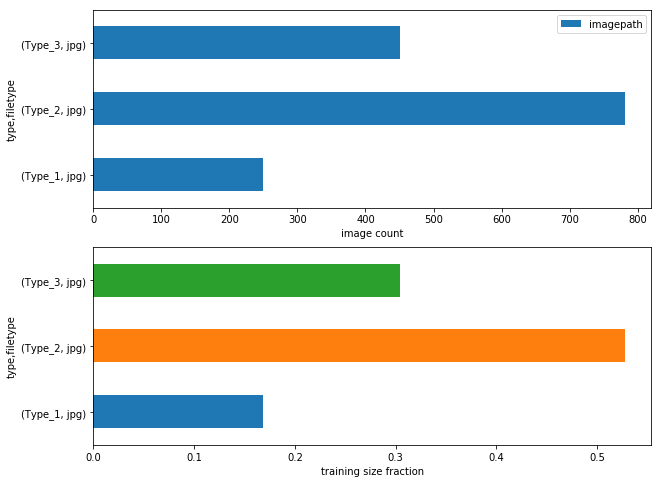

In [0]:
print('We have a total of {} images in the whole dataset'.format(all_cervix_images.shape[0]))
type_aggregation = all_cervix_images.groupby(['type', 'filetype']).agg('count')
type_aggregation_p = type_aggregation.apply(lambda row: 1.0*row['imagepath']/all_cervix_images.shape[0], axis=1)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

type_aggregation.plot.barh(ax=axes[0])
axes[0].set_xlabel("image count")
type_aggregation_p.plot.barh(ax=axes[1])
axes[1].set_xlabel("training size fraction")

/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:739: UserWarning:

Possibly corrupt EXIF data.  Expecting to read 524288 bytes but only got 0. Skipping tag 3

/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:739: UserWarning:

Possibly corrupt EXIF data.  Expecting to read 393216 bytes but only got 0. Skipping tag 3

/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:739: UserWarning:

Possibly corrupt EXIF data.  Expecting to read 33554432 bytes but only got 0. Skipping tag 4

/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:739: UserWarning:

Possibly corrupt EXIF data.  Expecting to read 25165824 bytes but only got 0. Skipping tag 4

/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:739: UserWarning:

Possibly corrupt EXIF data.  Expecting to read 131072 bytes but only got 0. Skipping tag 3

/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:739: UserWarning:

Possibly corrupt EXIF data.  Expecting to read 204

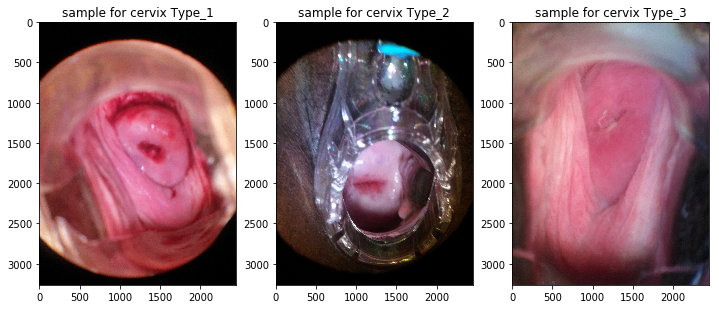

In [0]:
fig = plt.figure(figsize=(12,8))

i = 1
for t in all_cervix_images['type'].unique():
    ax = fig.add_subplot(1,3,i)
    i+=1
    f = all_cervix_images[all_cervix_images['type'] == t]['imagepath'].values[0]
    plt.imshow(plt.imread(f))
    plt.title('sample for cervix {}'.format(t))

In [0]:
from collections import defaultdict

images = defaultdict(list)

for t in all_cervix_images['type'].unique():
    sample_counter = 0
    for _, row in all_cervix_images[all_cervix_images['type'] == t].iterrows():
        #print('reading image {}'.format(row.imagepath))
        try:
            img = imread(row.imagepath)
            sample_counter +=1
            images[t].append(img)
        except:
            print('image read failed for {}'.format(row.imagepath))
        if sample_counter > 35:
            break
#print(sample_counter)

/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:739: UserWarning:

Possibly corrupt EXIF data.  Expecting to read 524288 bytes but only got 0. Skipping tag 3

/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:739: UserWarning:

Possibly corrupt EXIF data.  Expecting to read 393216 bytes but only got 0. Skipping tag 3

/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:739: UserWarning:

Possibly corrupt EXIF data.  Expecting to read 33554432 bytes but only got 0. Skipping tag 4

/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:739: UserWarning:

Possibly corrupt EXIF data.  Expecting to read 25165824 bytes but only got 0. Skipping tag 4

/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:739: UserWarning:

Possibly corrupt EXIF data.  Expecting to read 131072 bytes but only got 0. Skipping tag 3

/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:739: UserWarning:

Possibly corrupt EXIF data.  Expecting to read 217

/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:739: UserWarning:

Possibly corrupt EXIF data.  Expecting to read 524288 bytes but only got 0. Skipping tag 3

/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:739: UserWarning:

Possibly corrupt EXIF data.  Expecting to read 393216 bytes but only got 0. Skipping tag 3

/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:739: UserWarning:

Possibly corrupt EXIF data.  Expecting to read 33554432 bytes but only got 0. Skipping tag 4

/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:739: UserWarning:

Possibly corrupt EXIF data.  Expecting to read 25165824 bytes but only got 0. Skipping tag 4

/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:739: UserWarning:

Possibly corrupt EXIF data.  Expecting to read 131072 bytes but only got 0. Skipping tag 3

/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:739: UserWarning:

Possibly corrupt EXIF data.  Expecting to read 217

/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:739: UserWarning:

Possibly corrupt EXIF data.  Expecting to read 524288 bytes but only got 0. Skipping tag 3

/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:739: UserWarning:

Possibly corrupt EXIF data.  Expecting to read 393216 bytes but only got 0. Skipping tag 3

/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:739: UserWarning:

Possibly corrupt EXIF data.  Expecting to read 33554432 bytes but only got 0. Skipping tag 4

/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:739: UserWarning:

Possibly corrupt EXIF data.  Expecting to read 25165824 bytes but only got 0. Skipping tag 4

/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:739: UserWarning:

Possibly corrupt EXIF data.  Expecting to read 131072 bytes but only got 0. Skipping tag 3

/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:739: UserWarning:

Possibly corrupt EXIF data.  Expecting to read 204

In [0]:
dfs = []
for t in all_cervix_images['type'].unique():
    t_ = pd.DataFrame(
        {
            'nrows': list(map(lambda i: i.shape[0], images[t])),
            'ncols': list(map(lambda i: i.shape[1], images[t])),
            'nchans': list(map(lambda i: i.shape[2], images[t])),
            'type': t
        }
    )
    dfs.append(t_)

shapes_df = pd.concat(dfs, axis=0)
shapes_df_grouped = shapes_df.groupby(by=['nchans', 'ncols', 'nrows', 'type']).size().reset_index().sort_values(['type', 0], ascending=False)
shapes_df_grouped

,nchans,ncols,nrows,type,0
3,3,2448,3264,Type_3,28
6,3,3096,4128,Type_3,7
7,3,3264,2448,Type_3,1
5,3,3096,4128,Type_2,18
2,3,2448,3264,Type_2,17
8,3,4128,3096,Type_2,1
1,3,2448,3264,Type_1,18
4,3,3096,4128,Type_1,17
0,3,2322,4128,Type_1,1


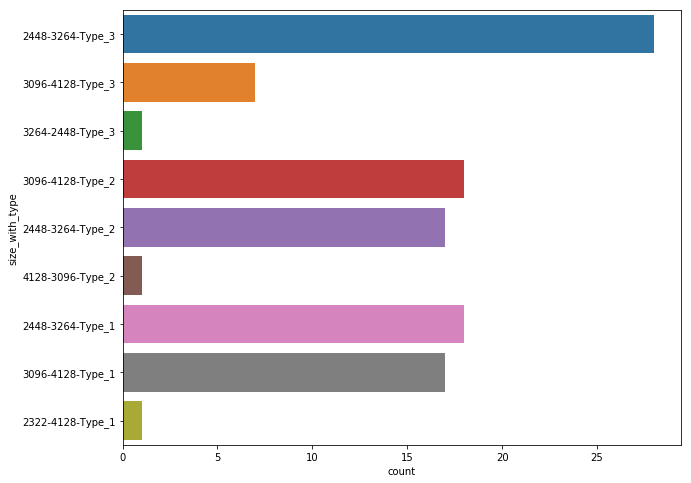

In [0]:
shapes_df_grouped['size_with_type'] = shapes_df_grouped.apply(lambda row: '{}-{}-{}'.format(row.ncols, row.nrows, row.type), axis=1)
shapes_df_grouped = shapes_df_grouped.set_index(shapes_df_grouped['size_with_type'].values)
shapes_df_grouped['count'] = shapes_df_grouped[[0]]

plt.figure(figsize=(10,8))
#shapes_df_grouped['count'].plot.barh(figsize=(10,8))
sns.barplot(x="count", y="size_with_type", data=shapes_df_grouped)

In [0]:
def transform_image(img, rescaled_dim, to_gray=False):
    resized = cv2.resize(img, (rescaled_dim, rescaled_dim), cv2.INTER_LINEAR)

    if to_gray:
        resized = cv2.cvtColor(resized, cv2.COLOR_RGB2GRAY).astype('float')
    else:
        resized = resized.astype('float')

    normalized = cv2.normalize(resized, None, 0.0, 1.0, cv2.NORM_MINMAX)
    timg = normalized.reshape(1, np.prod(normalized.shape))

    return timg/np.linalg.norm(timg)

rescaled_dim = 100

all_images = []
all_image_types = []

for t in all_cervix_images['type'].unique():
    all_images = all_images + images[t]
    all_image_types = all_image_types + len(images[t])*[t]
gray_all_images_as_vecs = [transform_image(img, rescaled_dim) for img in all_images]

gray_imgs_mat = np.array(gray_all_images_as_vecs).squeeze()
all_image_types = np.array(all_image_types)
gray_imgs_mat.shape, all_image_types.shape

((108, 30000), (108,))

In [0]:
from sklearn.manifold import TSNE
tsne = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=500,
    verbose=2
).fit_transform(gray_imgs_mat)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 108 samples in 0.004s...
[t-SNE] Computed neighbors for 108 samples in 0.034s...
[t-SNE] Computed conditional probabilities for sample 108 / 108
[t-SNE] Mean sigma: 0.222202
[t-SNE] Computed conditional probabilities in 0.011s
[t-SNE] Iteration 50: error = 104.2040405, gradient norm = 0.1558153 (50 iterations in 0.140s)
[t-SNE] Iteration 100: error = 127.2908173, gradient norm = 0.1288707 (50 iterations in 0.114s)
[t-SNE] Iteration 150: error = 130.4348450, gradient norm = 0.1262689 (50 iterations in 0.110s)
[t-SNE] Iteration 200: error = 130.6330566, gradient norm = 0.1320035 (50 iterations in 0.109s)
[t-SNE] Iteration 250: error = 136.0181427, gradient norm = 0.1158731 (50 iterations in 0.110s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 136.018143
[t-SNE] Iteration 300: error = 2.8462691, gradient norm = 0.0003389 (50 iterations in 0.119s)
[t-SNE] Iteration 350: error = 2.4127781, gradient norm = 0.000

In [0]:
from sklearn import preprocessing

trace1 = go.Scatter3d(
    x=tsne[:,0],
    y=tsne[:,1],
    z=tsne[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = preprocessing.LabelEncoder().fit_transform(all_image_types),
        colorscale = 'Portland',
        colorbar = dict(title = 'cervix types'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.9
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='3D embedding of images')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

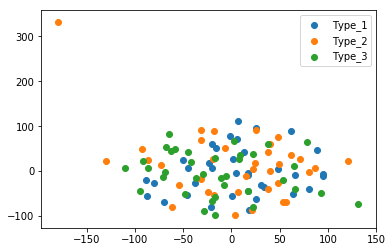

In [0]:
for t in all_cervix_images['type'].unique():
    tsne_t = tsne[np.where(all_image_types == t), :][0]
    plt.scatter(tsne_t[:, 0], tsne_t[:, 1])
plt.legend(all_cervix_images['type'].unique())

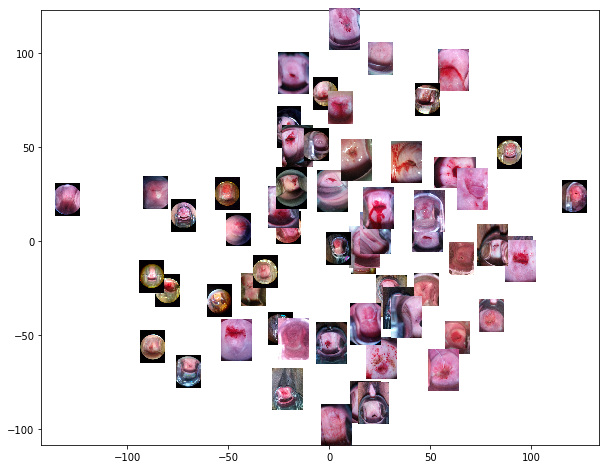

In [0]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
def imscatter(x, y, images, ax=None, zoom=0.01):
    ax = plt.gca()
    images = [OffsetImage(image, zoom=zoom) for image in images]
    artists = []
    for x0, y0, im0 in zip(x, y, images):
        ab = AnnotationBbox(im0, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    #return artists

nimgs = 60
plt.figure(figsize=(10,8))
imscatter(tsne[0:nimgs,0], tsne[0:nimgs,1], all_images[0:nimgs])

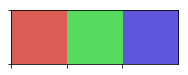

In [0]:
pal = sns.color_palette("hls", 3)
sns.palplot(pal)

/opt/conda/lib/python3.6/site-packages/seaborn/matrix.py:603: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix

/opt/conda/lib/python3.6/site-packages/seaborn/matrix.py:603: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



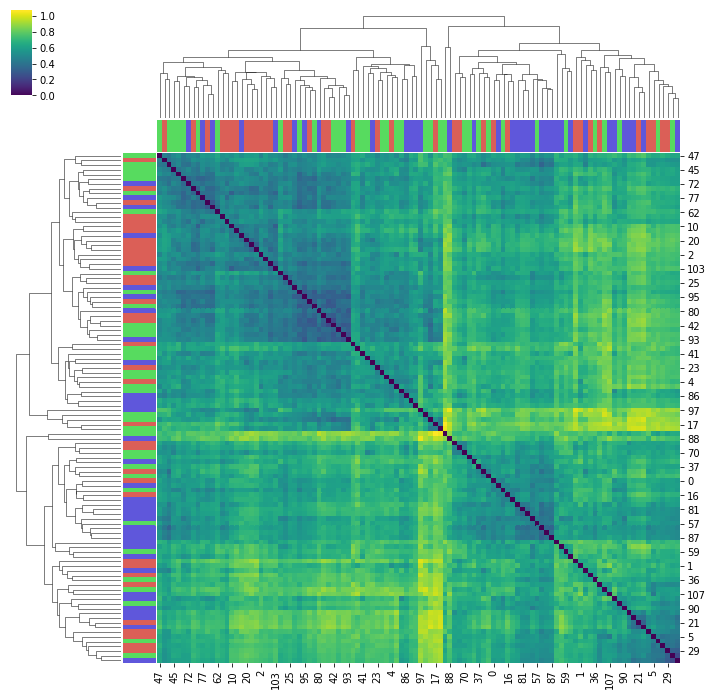

In [0]:
from scipy.spatial.distance import pdist, squareform

sq_dists = squareform(pdist(gray_imgs_mat))

all_image_types = list(all_image_types)

d = {
    'Type_1': pal[0],
    'Type_2': pal[1],
    'Type_3': pal[2]
}

# translate each sample to its color
colors = list(map(lambda t: d[t], all_image_types))

sns.clustermap(
    sq_dists,
    figsize=(12,12),
    row_colors=colors, col_colors=colors,
    cmap=plt.get_cmap('viridis')
)

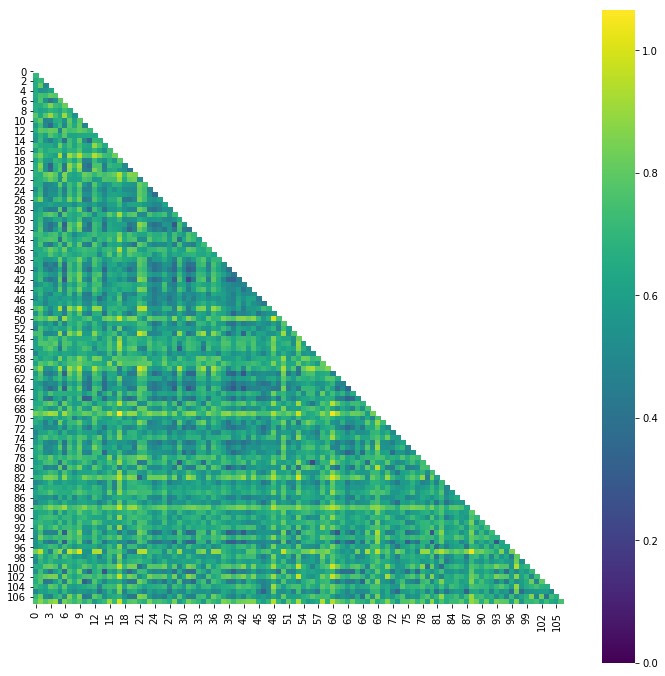

In [0]:
mask = np.zeros_like(sq_dists, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(12,12))
sns.heatmap(sq_dists, cmap=plt.get_cmap('viridis'), square=True, mask=mask)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning:

Mean of empty slice

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning:

Mean of empty slice



Text(0.5,1,'mean image')

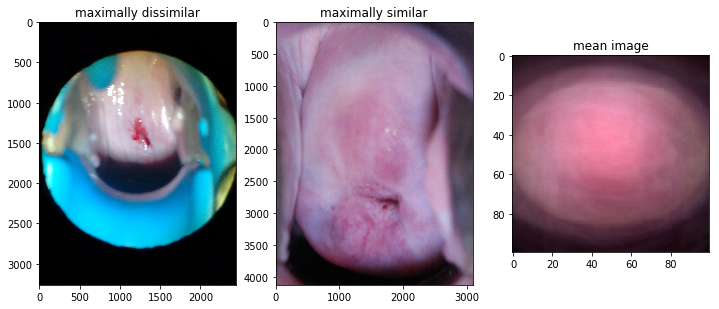

In [0]:
sq_dists[np.triu_indices_from(mask)] = np.nan
sq_dists[0, 0] = np.nan

fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(1,3,1)
maximally_dissimilar_image_idx = np.nanargmax(np.nanmean(sq_dists, axis=1))
plt.imshow(all_images[maximally_dissimilar_image_idx])
plt.title('maximally dissimilar')


ax = fig.add_subplot(1,3,2)
maximally_similar_image_idx = np.nanargmin(np.nanmean(sq_dists, axis=1))
plt.imshow(all_images[maximally_similar_image_idx])
plt.title('maximally similar')


ax = fig.add_subplot(1,3,3)
mean_img = gray_imgs_mat.mean(axis=0).reshape(rescaled_dim, rescaled_dim, 3)
plt.imshow(cv2.normalize(mean_img, None, 0.0, 1.0, cv2.NORM_MINMAX))
plt.title('mean image')

In [0]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
y = LabelEncoder().fit_transform(all_image_types).reshape(-1)
X = gray_imgs_mat 
X.shape, y.shape

((108, 30000), (108,))

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((72, 30000), (36, 30000), (72,), (36,))

In [0]:
y_train, y_test

(array([0, 1, 0, 1, 2, 1, 0, 0, 2, 0, 1, 0, 1, 1, 2, 0, 0, 2, 2, 0, 1, 1,
        0, 0, 0, 0, 1, 0, 2, 0, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1,
        2, 1, 2, 0, 2, 1, 1, 2, 1, 0, 2, 0, 1, 0, 0, 0, 2, 2, 2, 2, 2, 0,
        1, 1, 0, 2, 1, 2]),
 array([2, 0, 0, 2, 1, 1, 0, 1, 2, 0, 2, 2, 0, 2, 0, 1, 1, 2, 2, 1, 0, 1,
        1, 0, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 1, 2]))

In [0]:
clf = LogisticRegression()
grid = {
    'C': [1e-9, 1e-6, 1e-3, 1e0],
    'penalty': ['l1', 'l2']
}
cv = GridSearchCV(clf, grid, scoring='neg_log_loss', n_jobs=-1, verbose=1)
cv.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning:

You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    7.2s finished
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [1e-09, 1e-06, 0.001, 1.0], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_log_loss', verbose=1)

In [0]:
for i in range(1, len(cv.cv_results_['params'])+1):
    rank = cv.cv_results_['rank_test_score'][i-1]
    s = cv.cv_results_['mean_test_score'][i-1]
    sd = cv.cv_results_['std_test_score'][i-1]
    params = cv.cv_results_['params'][i-1]
    print("{0}. Mean validation neg log loss: {1:.6f} (std: {2:.6f}) - {3}".format(
        rank,
        s,
        sd,
        params
    ))

5. Mean validation neg log loss: -1.098612 (std: 0.000000) - {'C': 1e-09, 'penalty': 'l1'}
4. Mean validation neg log loss: -1.098612 (std: 0.000000) - {'C': 1e-09, 'penalty': 'l2'}
5. Mean validation neg log loss: -1.098612 (std: 0.000000) - {'C': 1e-06, 'penalty': 'l1'}
3. Mean validation neg log loss: -1.098612 (std: 0.000000) - {'C': 1e-06, 'penalty': 'l2'}
5. Mean validation neg log loss: -1.098612 (std: 0.000000) - {'C': 0.001, 'penalty': 'l1'}
2. Mean validation neg log loss: -1.098585 (std: 0.000032) - {'C': 0.001, 'penalty': 'l2'}
8. Mean validation neg log loss: -1.098710 (std: 0.000749) - {'C': 1.0, 'penalty': 'l1'}
1. Mean validation neg log loss: -1.091674 (std: 0.028704) - {'C': 1.0, 'penalty': 'l2'}


In [0]:
y_test_hat_p = cv.predict_proba(X_test)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



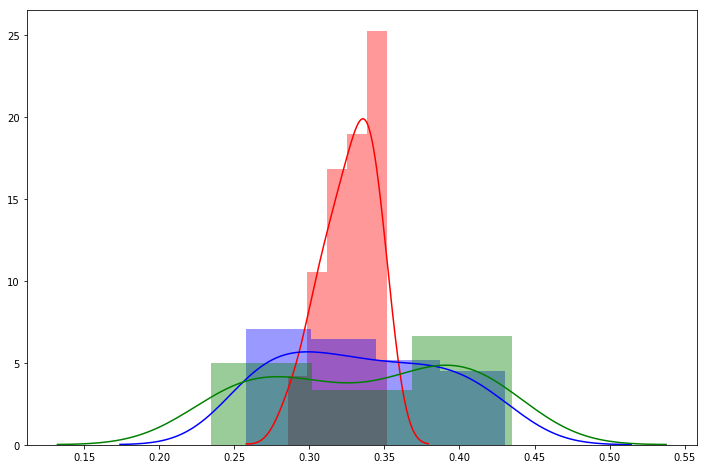

In [0]:
plt.figure(figsize=(12,8))
sns.distplot(y_test_hat_p[:,0], color='red')
sns.distplot(y_test_hat_p[:,1], color='blue')
sns.distplot(y_test_hat_p[:,2], color='green')

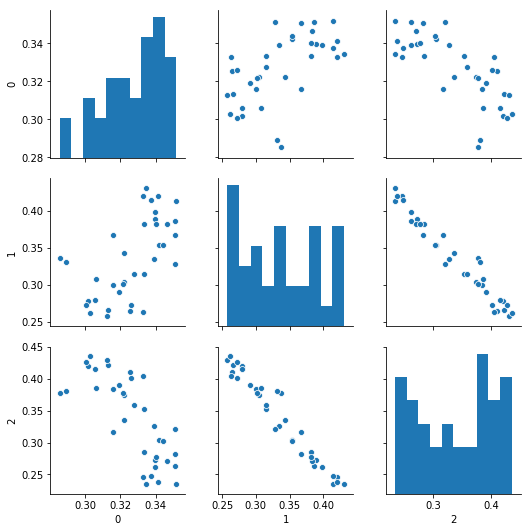

In [0]:
dfy = pd.DataFrame({'0': y_test_hat_p[:,0], '1': y_test_hat_p[:,1], '2': y_test_hat_p[:,2]})
sns.pairplot(dfy)

In [0]:
from sklearn.metrics import confusion_matrix

y_test_hat = cv.predict(X_test)



In [0]:
y_test_hat

array([1, 1, 1, 2, 2, 2, 2, 0, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2,
       1, 0, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1])